In [236]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [237]:
df= pd.read_csv("movies_data_2.0.csv")
no_skobochka = str.maketrans("", "", "[]' ")
df["Жанры"] = df["Жанры"].apply(lambda x: x.translate(no_skobochka).split(','))
df["Дата премьеры в мире"] = df["Дата премьеры в мире"].apply(lambda x: x.replace('T00:00:00.000Z',''))
#уберем ненужные столбцы, переведем в датный формат даты
del df["Дата премьеры в России"]
del df["Голоса кинокритиков"]
del df["Голоса российских кинокритиков"]
df.loc[:,"Дата премьеры в мире"]=pd.to_datetime(df["Дата премьеры в мире"])
df

,Название,Год выпуска,Длительность,Жанры,Рейтинг КиноПоиск,Рейтинг IMDB,Рейтинг кинокритиков,Рейтинг российских кинокритиков,Голоса КиноПоиск,Голоса IMDB,Бюджет,Дата премьеры в мире,Мировые кассовые сборы
0,1+1,2011,112.0,"[драма, комедия]",8.846,8.5,6.8,100.0000,2431363,966636,10355000,2011-09-23 00:00:00,426588510
1,Джентльмены,2019,113.0,"[криминал, комедия, боевик]",8.626,7.8,6.6,86.3636,2145499,427468,22000000,2019-12-03 00:00:00,115171795
2,Брат,1997,96.0,"[драма, криминал, боевик]",8.338,7.8,7.6,0.0000,1572786,26162,44955845,1997-05-17 00:00:00,1362281
3,Гнев человеческий,2021,119.0,"[боевик, триллер]",7.668,7.1,6.3,72.2222,1548405,221419,40000000,2021-04-22 00:00:00,103966489
4,Волк с Уолл-стрит,2013,180.0,"[драма, криминал, биография, комедия]",8.033,8.2,7.8,77.4194,1460341,1660210,100000000,2013-12-09 00:00:00,392000694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4869,Овечка Долли была злая и рано умерла,2015,109.0,"[фантастика, комедия, приключения]",6.715,5.8,0.0,0.0000,26802,334,960000,2015-11-05 00:00:00,112164013
4870,Орел и решка,1995,82.0,"[комедия, мелодрама]",7.875,7.0,0.0,0.0000,26799,577,44955845,1995-11-03 00:00:00,112164013
4871,Ничего себе поездочка,2001,97.0,"[боевик, триллер, детектив]",6.927,6.6,6.6,0.0000,26789,78541,23000000,2001-09-09 00:00:00,36642838
4872,Американский огурчик,2020,88.0,"[комедия, фантастика, драма]",5.991,5.7,6.1,100.0000,26781,27737,44955845,2020-07-26 00:00:00,499649


Посмотрим на данные

In [238]:
#функции для определения мин среднего бюджета во временном промежутке
def min_budget(year1,year2):
    df_year=df[df["Дата премьеры в мире"].apply(lambda x:x.year <= year2 and x.year >=year1)]
    return int(df_year["Бюджет"].min())
def mean_budget(year1,year2):
    df_year=df[df["Дата премьеры в мире"].apply(lambda x:x.year <= year2 and x.year >=year1)]
    return int(df_year["Бюджет"].mean())


In [239]:
#создадим новый фрейм, который покажет нам, сколько фильмов выпускалось в разные годы
max_year=df["Дата премьеры в мире"].max().year
min_year=df["Дата премьеры в мире"].min().year
df_number_of_films= pd.DataFrame(columns=['год', 'количество выпущенных фильмов'])

list_of_years = np.arange(min_year, max_year+1)

for i in list_of_years:
     df_number_of_films.loc[len(df_number_of_films)] = [i, int(df["Дата премьеры в мире"].apply(lambda x:x.year == i).sum())]

df_number_of_films.head(5)

,год,количество выпущенных фильмов
0,1921,1
1,1922,0
2,1923,0
3,1924,0
4,1925,0


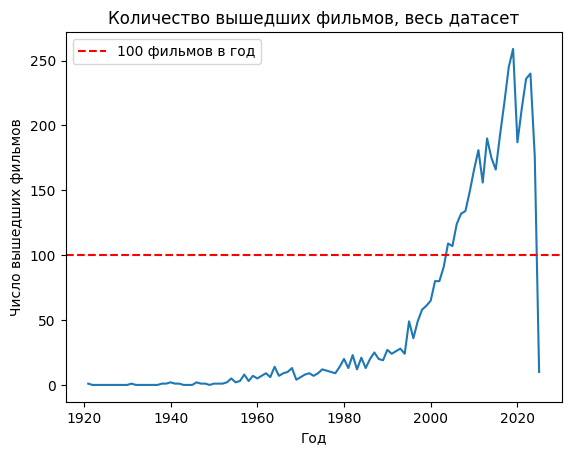

In [240]:
#визуализируем данные, чтобы убрать года с маленьким кол-вом фильмов
plt.plot(df_number_of_films["год"], df_number_of_films["количество выпущенных фильмов"])
plt.axhline(y=100, color="r", linestyle="dashed", label="100 фильмов в год")
plt.ylabel('Число вышедших фильмов')
plt.xlabel('Год')
plt.title('Количество вышедших фильмов, весь датасет')
plt.gca().legend()
plt.show()

Видно, что в нашей выборке много годов с маленьким количеством вышедших фильмов. Для детального анализа оставим только те года, в которые выпускалось больше 100 фильмов.

In [241]:
#создаем фрейм с годами, в которых больше 100 фильмов
df_100=df_number_of_films.loc[df_number_of_films["количество выпущенных фильмов"]>=100]

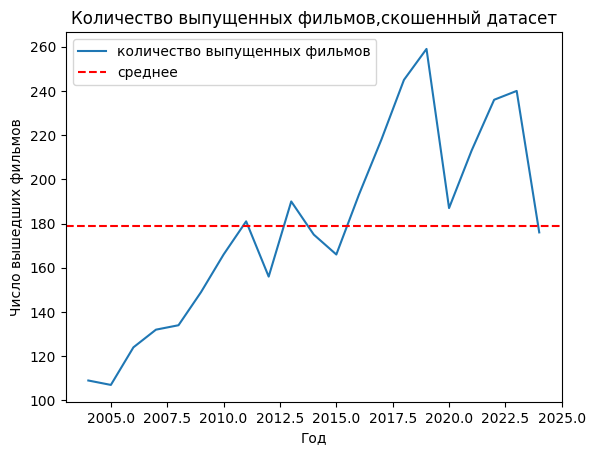

In [242]:
#посмотрим на среднее по этим годам
df_100.plot(x="год",y="количество выпущенных фильмов")
plt.axhline(y=df_100["количество выпущенных фильмов"].mean(), color="r", linestyle="dashed", label="среднее")
plt.ylabel('Число вышедших фильмов')
plt.xlabel('Год')
plt.gca().legend()
plt.title('Количество выпущенных фильмов,скошенный датасет')
plt.show()

Посмотрим, как в этих годах менялся средний бюджет

/tmp/ipykernel_28640/671522221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100["Средний бюджет"]=0
/tmp/ipykernel_28640/671522221.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '47714558.07339449' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_100.loc[df_100["год"]==i,"Средний бюджет"]=df[df["Дата премьеры в мире"].apply(lambda x:x.year == i)]["Бюджет"].mean()


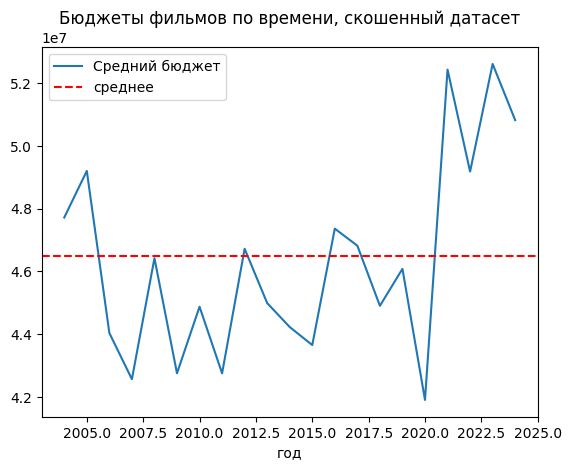

In [243]:
df_100["Средний бюджет"]=0
for i in df_100["год"]:
    df_100.loc[df_100["год"]==i,"Средний бюджет"]=df[df["Дата премьеры в мире"].apply(lambda x:x.year == i)]["Бюджет"].mean()
df_100.plot(x="год",y="Средний бюджет")
plt.axhline(y=mean_budget(2004,2024), color="r", linestyle="dashed", label="среднее")
plt.gca().legend()
plt.title('Бюджеты фильмов по времени, скошенный датасет')
plt.show()

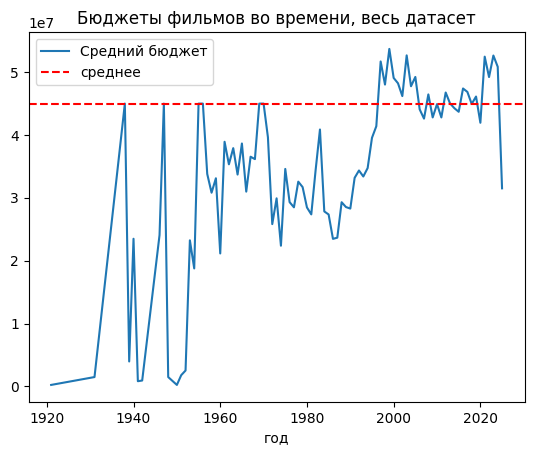

In [244]:
#посмотрим, можно ли закрыть глаза на инфляцию для нашего промежутка (спойлер, что скорее да, чем нет)
df_number_of_films["Средний бюджет"]=0
for i in df_number_of_films["год"]:
    df_number_of_films.loc[df_number_of_films["год"]==i,"Средний бюджет"]=df[df["Дата премьеры в мире"].apply(lambda x:x.year == i)]["Бюджет"].mean()
#df_number_of_films.plot(x="год",y="Средний бюджет")
df_number_of_films  = df_number_of_films[df_number_of_films["Средний бюджет"].notna()]
df_number_of_films.plot(x="год",y="Средний бюджет")
plt.axhline(y=mean_budget(1920,2025), color="r", linestyle="dashed", label="среднее")
plt.gca().legend()
plt.title('Бюджеты фильмов во времени, весь датасет')
plt.show()

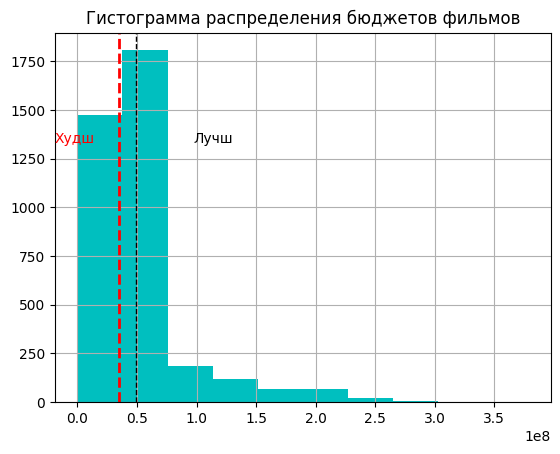

In [245]:
# чекнем, как распределяется бюджет по этим годам, сравним со средним бюджетом для топ фильмов и для не очень фильмов
best_mean=df.loc[df["Рейтинг IMDB"].apply(lambda x: x >=9)]["Бюджет"].mean()
worst_mean=df.loc[df["Рейтинг IMDB"].apply(lambda x: x <=4)]["Бюджет"].mean()


df_2004_2024= df.loc[df["Дата премьеры в мире"].apply(lambda x:x.year <= 2024 and x.year >=2004)]
df_2004_2024["Бюджет"].hist(color='c')
plt.axvline(worst_mean, color='red', linestyle='dashed', linewidth=2)
plt.axvline(best_mean, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
min_xlim, max_xlim = plt.xlim()
plt.text(min_xlim, max_ylim*0.7,'Худш',color='red')
plt.text(best_mean*2, max_ylim*0.7,'Лучш',color='k')
plt.title('Гистограмма распределения бюджетов фильмов')
plt.show()


Что видим на картинке? Фильмы, которые высоко оцениваются критиками, имеют больший бюджет.

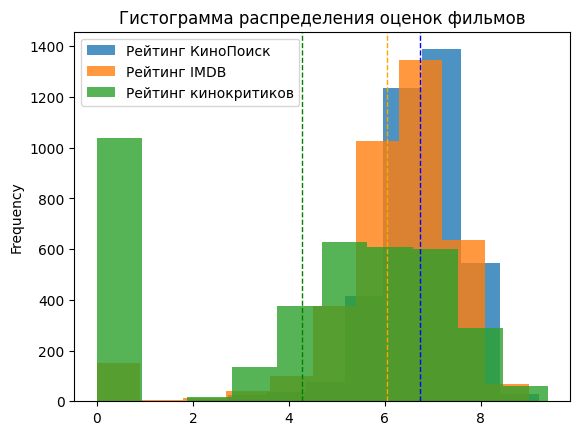

In [258]:
# чекнем, как эти фильмы оцениваются разными источниками
kritika=['Рейтинг КиноПоиск','Рейтинг IMDB','Рейтинг кинокритиков']
for i in kritika:
  df_2004_2024[i].plot.hist(label=i,alpha=0.8)
plt.gca().legend()
plt.axvline(df_2004_2024['Рейтинг КиноПоиск'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(df_2004_2024['Рейтинг IMDB'].mean(), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(df_2004_2024['Рейтинг кинокритиков'].mean(), color='green', linestyle='dashed', linewidth=1)
plt.title('Гистограмма распределения оценок фильмов')
plt.show()

Какой делаем вывод? На кинопоиске либо сидят очень добрые люди, либо люди, которые не разбираются в кино. Кинокритики, как и ожидалось, разносят киношки 

In [247]:
#создаем список с жанрами
b=[]
g=[]
genres=[]
for i in df_kino["Жанры"]:
    b.extend(i)
for i in np.unique(b): 
    g.append(str(i).strip())
for i in np.unique(g):
    genres.append(str(i))
#создаем датафрейм
dict = {'жанры':genres
        }
df_genres= pd.DataFrame(dict)
df_genres['Рейтинг КиноПоиск']=0
df_genres['Рейтинг IMDB']=0
df_genres['Рейтинг кинокритиков']=0

In [ ]:
df_kino=df_2004_2024.loc[df["Рейтинг КиноПоиск"].apply(lambda x: x>=8)]
df_kritics=df_2004_2024.loc[df["Рейтинг кинокритиков"].apply(lambda x: x>=8)]
df_imdb=df_2004_2024.loc[df["Рейтинг IMDB"].apply(lambda x: x>=8)]
for i in df_kino["Жанры"]:
    for j in range(len(df_genres)):
        if df_genres.loc[j]['жанры'] in i:
            df_genres.at[j,'Рейтинг КиноПоиск']=df_genres.loc[j][1]+1
for i in df_kritics["Жанры"]:
    for j in range(len(df_genres)):
        if df_genres.loc[j]['жанры'] in i:
            df_genres.at[j,'Рейтинг кинокритиков']=df_genres.loc[j][1]+1
for i in df_imdb["Жанры"]:
    for j in range(len(df_genres)):
        if df_genres.loc[j]['жанры'] in i:
            df_genres.at[j,'Рейтинг IMDB']=df_genres.loc[j][1]+1
df_genres.sort_values(by='Рейтинг IMDB')

/tmp/ipykernel_28640/29228561.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_genres.at[j,'Рейтинг КиноПоиск']=df_genres.loc[j][1]+1
/tmp/ipykernel_28640/29228561.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_genres.at[j,'Рейтинг кинокритиков']=df_genres.loc[j][1]+1
/tmp/ipykernel_28640/29228561.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_genres.at[j,'Рейтинг IMDB']=df_genres.loc[j][1]+1


,жанры,Рейтинг КиноПоиск,Рейтинг IMDB,Рейтинг кинокритиков
5,детский,8,0,0
2,вестерн,4,5,5
10,короткометражка,4,5,0
14,мюзикл,8,9,9
13,музыка,24,25,25
4,детектив,40,41,41
19,фантастика,48,49,49
8,история,52,53,53
20,фэнтези,56,57,57
3,военный,60,61,61


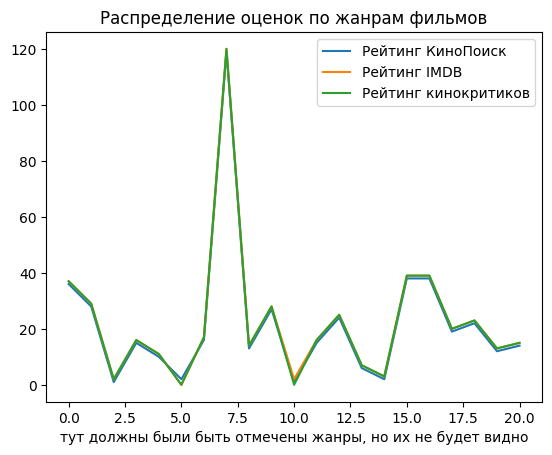

In [ ]:
for i in kritika:
  df_genres[i].plot(label=i)
plt.xlabel('кол-во фильмов')
plt.xlabel('тут должны были быть отмечены жанры, но их не будет видно')
plt.gca().legend()
plt.title('Распределение хороших оценок по жанрам фильмов')
plt.show()

Тут мы видим, что оценки разных агентств не зависят от жанров (предпочтения шибко не меняются).Лучше всего оцениваются драмы, прикллючения и семейный жанры

/tmp/ipykernel_28640/2785735158.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_genres_worst.at[j,'Рейтинг КиноПоиск']=df_genres_worst.loc[j][1]+1
/tmp/ipykernel_28640/2785735158.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_genres_worst.at[j,'Рейтинг кинокритиков']=df_genres_worst.loc[j][1]+1


/tmp/ipykernel_28640/2785735158.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_genres_worst.at[j,'Рейтинг IMDB']=df_genres_worst.loc[j][1]+1


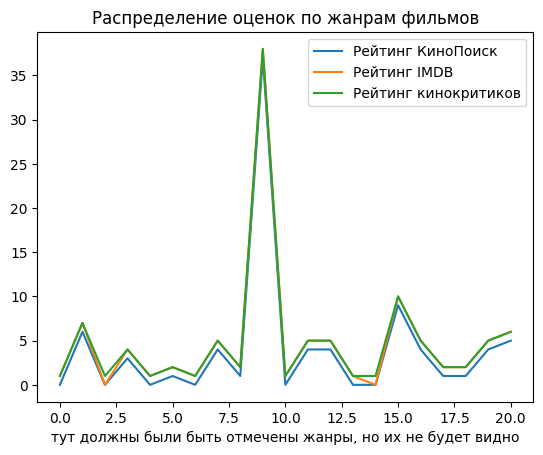

In [ ]:
df_genres_worst= pd.DataFrame(dict)
df_genres_worst['Рейтинг КиноПоиск']=0
df_genres_worst['Рейтинг IMDB']=0
df_genres_worst['Рейтинг кинокритиков']=0
df_kinoo=df_2004_2024.loc[df["Рейтинг КиноПоиск"].apply(lambda x: x<=4)]
df_kriticss=df_2004_2024.loc[df["Рейтинг кинокритиков"].apply(lambda x: x<=4)]
df_imdbb=df_2004_2024.loc[df["Рейтинг IMDB"].apply(lambda x: x<=4)]
for i in df_kinoo["Жанры"]:
    for j in range(len(df_genres)):
        if df_genres_worst.loc[j]['жанры'] in i:
            df_genres_worst.at[j,'Рейтинг КиноПоиск']=df_genres_worst.loc[j][1]+1
for i in df_kriticss["Жанры"]:
    for j in range(len(df_genres)):
        if df_genres_worst.loc[j]['жанры'] in i:
            df_genres_worst.at[j,'Рейтинг кинокритиков']=df_genres_worst.loc[j][1]+1
for i in df_imdbb["Жанры"]:
    for j in range(len(df_genres)):
        if df_genres_worst.loc[j]['жанры'] in i:
            df_genres_worst.at[j,'Рейтинг IMDB']=df_genres_worst.loc[j][1]+1
for i in kritika:
  df_genres_worst[i].plot(label=i)
plt.xlabel('кол-во фильмов')
plt.xlabel('тут должны были быть отмечены жанры, но их не будет видно')
plt.gca().legend()
plt.title('Распределение плохих оценок по жанрам фильмов')
plt.show()

In [268]:
df_genres_worst.sort_values(by='Рейтинг IMDB')

,жанры,Рейтинг КиноПоиск,Рейтинг IMDB,Рейтинг кинокритиков
2,вестерн,0,0,1
14,мюзикл,0,0,1
6,документальный,0,1,1
0,биография,0,1,1
10,короткометражка,0,1,1
13,музыка,0,1,1
4,детектив,0,1,1
5,детский,1,2,2
8,история,1,2,2
17,спорт,1,2,2


In [ ]:
Распределение по жанрам одинаковое. Хуже всего оцениваются комедии и приключения. Может быть и бюджет у них меньше?

In [280]:
df_genres['фильмов снято']=0
df_genres['общая сумма бюджета']=0
for i in df_2004_2024["Жанры"]:
    for j in range(len(df_genres)):
        if df_genres.loc[j]['жанры'] in i:
            df_genres.at[j,'фильмов снято']=df_genres.loc[j][1]+1
for i in range(len(df_2004_2024)):
    for j in range(len(df_genres)):
        if df_genres.loc[j]['жанры'] in df_2004_2024.iloc[i]["Жанры"]:
            df_genres.at[j,'общая сумма бюджета']=df_genres.loc[j][1]+df_2004_2024.iloc[i]["Бюджет"]

/tmp/ipykernel_28640/2406449492.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_genres.at[j,'фильмов снято']=df_genres.loc[j][1]+1
/tmp/ipykernel_28640/2406449492.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_genres.at[j,'общая сумма бюджета']=df_genres.loc[j][1]+df_2004_2024.iloc[i]["Бюджет"]


In [290]:
df_genres['средний бюджет на картину']=df_genres["общая сумма бюджета"]/df_genres["фильмов снято"]
df_genres.sort_values(by='средний бюджет на картину')


,жанры,Рейтинг КиноПоиск,Рейтинг IMDB,Рейтинг кинокритиков,фильмов снято,общая сумма бюджета,средний бюджет на картину
15,приключения,152,153,153,153,960152,6.275503e+03
7,драма,476,477,477,477,44956321,9.424805e+04
0,биография,144,145,145,145,28000144,1.931044e+05
16,семейный,152,153,153,153,30000152,1.960794e+05
12,мелодрама,96,97,97,97,30000096,3.092793e+05
20,фэнтези,56,57,57,57,19300056,3.385975e+05
1,боевик,112,113,113,113,44955957,3.978403e+05
9,комедия,108,109,109,109,44955953,4.124399e+05
11,криминал,60,61,61,61,30000060,4.918043e+05
18,триллер,88,89,89,89,44955933,5.051228e+05


Видим, что самые дешевые картины - приключения, самые дорогие - мюзиклы. 